<a href="https://colab.research.google.com/github/RSKothari/Learn-Backprop/blob/main/Multidimensional_Line_Fitting_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Load required packages
import re
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

In [2]:
def generate_points(num_pts=1000, add_noise=True, mode='3D'):
  
  #  Generate random points along a line
  num_input_dims = int(re.findall(r'\d+', mode)[0]) - 1
  
  random_slope = 5*np.random.rand(num_input_dims, ) - 2.5  # Random slope
  random_intercept = 20*np.random.rand(1, ) - 10  # Random intercept

  ip_pts = 100*np.random.rand(num_pts, num_input_dims) - 50

  op_gt = np.dot(ip_pts, random_slope) + random_intercept

  ip_noise = np.random.normal(0, 20, (num_pts, num_input_dims)) if add_noise else 0
  op_noise = np.random.normal(0, 20, (num_pts, )) if add_noise else 0

  gt_params = {'slope': random_slope,
                'intercept': random_intercept}

  return (ip_pts + ip_noise, op_gt + op_noise, gt_params)

In [3]:
def forward(model, x):
  return x.dot(model['slope']) + model['intercept']

# 3D data

Let's take the next step by another dimension. What happens if we want to find a model which fits a 3D line?

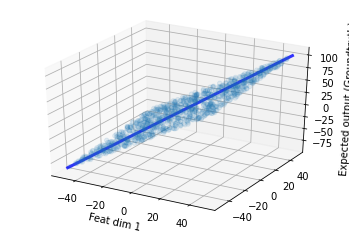

In [4]:
# Plot 3D points and groundtruth line
mode='3D'
input, y_gt, gt_params = generate_points(add_noise=False, mode=mode)

xy_min, xy_max = input.min(axis=0), input.max(axis=0)
z_min, z_max = forward(gt_params, xy_min), forward(gt_params, xy_max)

if mode == '3D':
  fig = plt.figure()
  axs = fig.add_subplot(projection='3d')
  axs.scatter3D(input[:, 0], input[:, 1], y_gt, alpha=0.1)
  axs.plot3D([xy_min[0], xy_max[0]],
             [xy_min[1], xy_max[1]],
             [z_min[0], z_max[0]],
             'b-', linewidth=3, alpha=0.8)
  axs.set_xlabel('Feat dim 0')
  axs.set_xlabel('Feat dim 1')
  axs.set_zlabel('Expected output (Groundtruth)')


# Linear model for multidimensional input

The compact matrix representation for multidimensional inputs can be expressed as follows.

$\hat{Y}_{(1 \times N)} = H_{(1 \times 3)}X_{(3 \times N)}$, where $X$ is denoted as $[x^0_i, x^1_i, 1]^T$ for $i \in [0...N]$

Expanding this compact representation for each sample gives us:

$\hat{y}_i = M_{(1 \times 2)}X_i + C$ where $X$ is denoted as $[x^0_i, x^1_i]^T$ for $i \in [0...N]$


First, take a minute to ensure you are comfortable with the new notations. You will notice that they slightly differ from previously established notations. For starters, we now move onto *features* and *dimensions* instead of *x-axis* or *y-axis*. The above figure represents a system which takes a 2D input and returns a 1D output. Details about what consists a *feature* and its *dimensions* will be covered in class.

Recall the MSE loss function.

$f(H) = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i(H))^2$

Our model comprises of two independant parameters, $M_{(2 \times 1)}$ and $C$.

$M_{(2 \times 1)}^+$ $\leftarrow M_{(2 \times 1)} - \alpha \nabla f(M)$

 $C^+$ $\leftarrow C - \alpha \nabla f(C)$

 Let us derive the parameter update rule for $M$;
 
 $\nabla f(M) = \frac{\delta (\frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2)}{\delta M}$

 $\nabla f(M) = \frac{1}{2N} \sum_{i=1}^{N} \frac{\delta}{\delta M} (y_i - \hat{y}_i)^2$

 $\nabla f(M) = \frac{1}{2N} \sum_{i=1}^{N} 2(y_i - \hat{y}_i)(-\frac{\delta}{\delta M}\hat{y}_i)$

This is where it gets tricky. $M$ is no longer 1D. One cannot simply compute a 1D value for $\frac{\delta \hat{y}_i}{\delta M}$. We realize that $M = [m^0, m^1]$. Hence, 

$\frac{\delta \hat{y}_i}{\delta M} = \Big [ \frac{\delta \hat{y}_i}{\delta m^0}, \frac{\delta \hat{y}_i}{\delta m^1} \Big ]$

$\nabla f(M) = \frac{1}{N} \sum_{i=1}^{N} ( \hat{y}_i - y_i) [x^0_i, x^1_i]^T$

$\nabla f(C) = \frac{1}{N} \sum_{i=1}^{N} ( \hat{y}_i - y_i)$

The recovered slope is: (1.638044, 0.261718). Groundtruth is: (1.622896, 0.263575)
The recovered intercept is: 0.075311. Groundtruth is: 7.253757


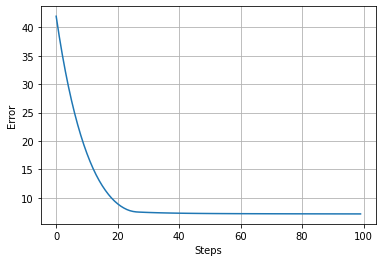

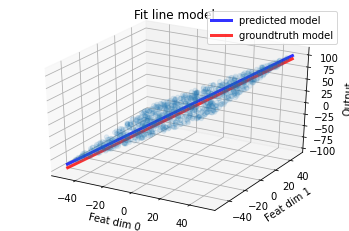

In [5]:
num_pts = input.shape[0]

model = {}

# We initialize with 0s
model['slope'] = np.array([0, 0])
model['intercept'] = np.array([0])

model['error'] = []
model['step'] = []

alpha = 1e-4 # 1e-3  # Set the learning rate
steps = 100 # 20 #  10000

for step in range(steps):

  y_preds = forward(model, input)

  model['slope'] = model['slope'] - alpha*np.mean((y_preds - y_gt).reshape(-1, 1)*input, axis=0)
  model['intercept'] = model['intercept'] - alpha*np.mean(y_preds - y_gt)
  model['error'].append(np.mean(np.abs(y_preds - y_gt)))
  model['step'].append(step)

fig, axs = plt.subplots()
axs.plot(model['step'], model['error'])
axs.set_xlabel('Steps')
axs.set_ylabel('Error')
axs.grid('on')

print('The recovered slope is: (%f, %f). Groundtruth is: (%f, %f)' % (model['slope'][0], model['slope'][1], gt_params['slope'][0], gt_params['slope'][1]))
print('The recovered intercept is: %f. Groundtruth is: %f' % ( model['intercept'], gt_params['intercept']))

xy_min, xy_max = input.min(axis=0), input.max(axis=0)

z_min, z_max = forward(gt_params, xy_min), forward(gt_params, xy_max)
z_min_model, z_max_model = forward(model, xy_min), forward(model, xy_max)

fig = plt.figure()
axs = fig.add_subplot(projection='3d')
axs.scatter3D(input[:, 0], input[:, 1], y_gt, alpha=0.1)

# Plot groundtruth line
axs.plot3D([xy_min[0], xy_max[0]],
           [xy_min[1], xy_max[1]],
           [z_min[0], z_max[0]],
           'b-', linewidth=3, alpha=0.8)

# Plot predicted line
axs.plot3D([xy_min[0], xy_max[0]],
           [xy_min[1], xy_max[1]],
           [z_min_model[0], z_max_model[0]],
           'r-', linewidth=3, alpha=0.8)

axs.set_xlabel('Feat dim 0')
axs.set_ylabel('Feat dim 1')
axs.set_zlabel('Output')

axs.axis('on')
axs.grid('on')
axs.set_title('Fit line model')
axs.legend(['predicted model', 'groundtruth model'])